In [ ]:
from google.colab import files
uploaded = files.upload()


Saving LoanData (1).csv to LoanData (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("LoanData (1).csv")  # Make sure filename is correct

df.head()  # Show first 5 rows


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()  # for numeric columns
df.describe(include='object')  # for text/categorical columns


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Safely filling missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [ ]:
df.sort_values(by='ApplicantIncome', ascending=False).head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y


In [ ]:
def income_group(income):
    if income > 25000:
        return 'High'
    elif income > 10000:
        return 'Medium'
    else:
        return 'Low'

df['Income_Level'] = df['ApplicantIncome'].apply(income_group)
df[['ApplicantIncome', 'Income_Level']].head()


,ApplicantIncome,Income_Level
0,5849,Low
1,4583,Low
2,3000,Low
3,2583,Low
4,6000,Low


In [ ]:
df['Loan_Status_Binary'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
df[['Loan_Status', 'Loan_Status_Binary']].head()


,Loan_Status,Loan_Status_Binary
0,Y,1
1,N,0
2,Y,1
3,Y,1
4,Y,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


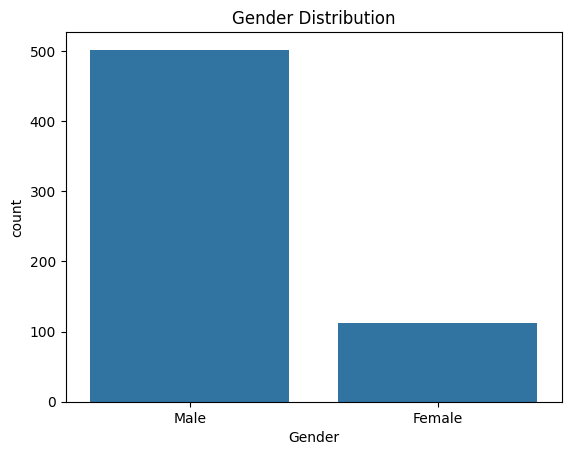

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


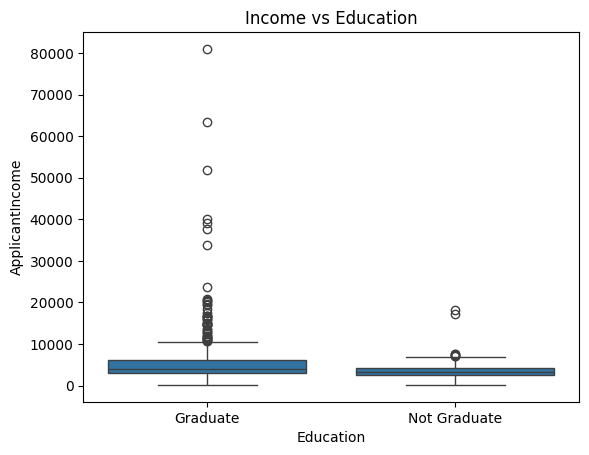

In [ ]:
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Income vs Education")
plt.show()


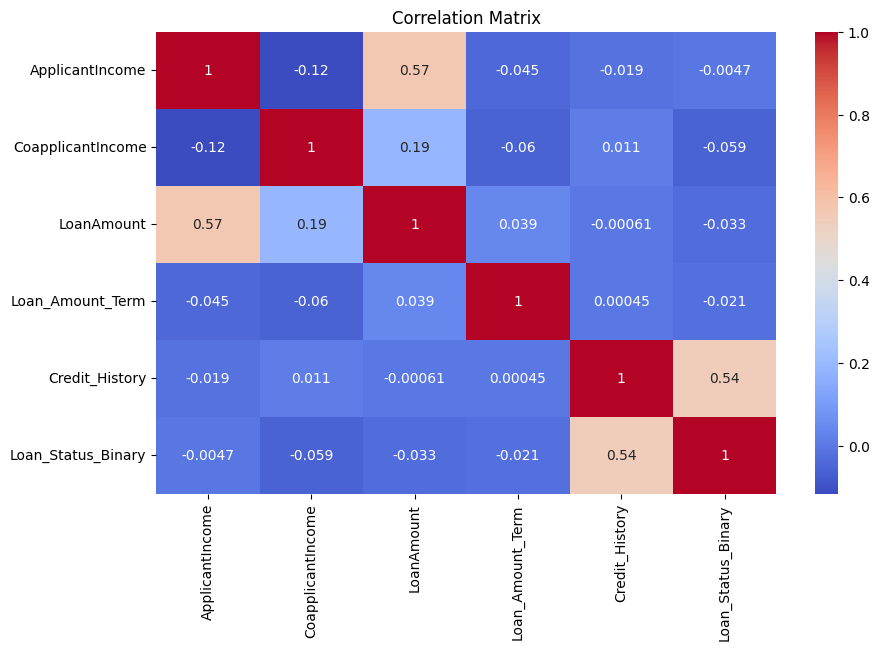

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
